# ANOVA Test & Chi-Square Applied On Different Features

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [6]:
df_merged = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/us_flight_2023/df_merged.csv')

## 1. Feature : Dep_Airport 

### ANOVA

For Dep_Airport hypothesis:

Null Hypothesis (H0): The mean 'Dep_Delay_Tag' is the same across all 'Dep_Airport'

Look at the p-value in the ANOVA table:

If the p-value is less than your significance level (commonly 0.05), the null hypothesis is rejected, indicating that 'Dep_Airport' has a statistically significant impact on 'Dep_Delay_Tag'.
If the p-value is greater than your significance level, the null hypothesis is NOT rejected, indicating that there is no significant impact of 'Dep_Airport' on 'Dep_Delay_Tag'.

In [4]:
# Sample 500,000 rows from the dataset
df_sampled_1 = df_merged.sample(n=500000, random_state=1)

# Check the unique values of Dep_Delay_Tag to determine if mapping is needed
print(df_sampled_1['Dep_Delay_Tag'].unique())

model = ols('Dep_Delay_Tag ~ C(Dep_Airport)', data=df_sampled_1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

[0 1]
                       sum_sq        df          F  PR(>F)
C(Dep_Airport)    2831.605021     348.0  35.432924     0.0
Residual        114739.565147  499651.0        NaN     NaN


### Chi-Square

In [5]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df_sampled_1['Dep_Airport'], df_sampled_1['Dep_Delay_Tag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 12042.0891306864
p-value: 0.0
Degrees of Freedom: 348
Expected Frequencies Table:
[[2.04602468e+02 1.24397532e+02]
 [6.09454160e+01 3.70545840e+01]
 [1.01368396e+03 6.16316040e+02]
 [3.29602760e+01 2.00397240e+01]
 [3.04727080e+01 1.85272920e+01]
 [5.59702800e+01 3.40297200e+01]
 [4.97513600e+01 3.02486400e+01]
 [7.77365000e+01 4.72635000e+01]
 [1.52985432e+02 9.30145680e+01]
 [4.35324400e+00 2.64675600e+00]
 [3.10946000e+01 1.89054000e+01]
 [7.71146080e+01 4.68853920e+01]
 [1.71642192e+02 1.04357808e+02]
 [1.18159480e+01 7.18405200e+00]
 [5.16170360e+02 3.13829640e+02]
 [3.73135200e+00 2.26864800e+00]
 [1.30597320e+01 7.94026800e+00]
 [2.34453284e+02 1.42546716e+02]
 [7.79230676e+02 4.73769324e+02]
 [2.11443280e+01 1.28556720e+01]
 [2.79851400e+02 1.70148600e+02]
 [1.52873491e+04 9.29465086e+03]
 [2.32587608e+02 1.41412392e+02]
 [4.18968640e+03 2.54731360e+03]
 [5.31095768e+02 3.22904232e+02]
 [9.20400160e+01 5.59599840e+01]
 [2.52488152e+02 1.53511848e+02]


## 2. Feature:Arr_Airport

### ANOVA

In [7]:
df_sampled_2 = df_merged.sample(n=500000, random_state=1)

print(df_sampled_2['Arr_Delay_Type'].unique())

# Convert Arr_Delay_Type to numeric
delay_type_mapping = {'Low <5min': 0, 'Medium >15min': 1, 'High >60min': 2}
df_sampled_2['Arr_Delay_Type'] = df_sampled_2['Arr_Delay_Type'].map(delay_type_mapping)

model = ols('Arr_Delay_Type ~ C(Arr_Airport)', data=df_sampled_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

['Low <5min' 'Medium >15min' 'Hight >60min']
                      sum_sq        df         F         PR(>F)
C(Arr_Airport)    282.614238     348.0  6.761178  5.271536e-293
Residual        55985.217856  466102.0       NaN            NaN


### Chi-Square

In [8]:
contingency_table = pd.crosstab(df_sampled_2['Arr_Airport'], df_sampled_2['Arr_Delay_Type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 2342.8251806930593
p-value: 4.474644268795611e-292
Degrees of Freedom: 348
Expected Frequencies Table:
[[2.34692877e+02 3.83071234e+01]
 [9.80036188e+01 1.59963812e+01]
 [1.37720875e+03 2.24791251e+02]
 [3.78259581e+01 6.17404186e+00]
 [5.93179798e+01 9.68202019e+00]
 [8.33890441e+01 1.36109559e+01]
 [6.44760650e+01 1.05239350e+01]
 [9.11261719e+01 1.48738281e+01]
 [1.84831386e+02 3.01686136e+01]
 [5.15808520e+00 8.41914799e-01]
 [4.21243625e+01 6.87563753e+00]
 [1.00582661e+02 1.64173386e+01]
 [2.07183089e+02 3.38169111e+01]
 [1.37548939e+01 2.24510613e+00]
 [7.22131928e+02 1.17868072e+02]
 [4.29840433e+00 7.01595666e-01]
 [1.80532982e+01 2.94670180e+00]
 [3.03467346e+02 4.95326540e+01]
 [1.06428491e+03 1.73715087e+02]
 [1.97726599e+01 3.22734006e+00]
 [3.45591708e+02 5.64082915e+01]
 [1.99953173e+04 3.26368272e+03]
 [3.08625431e+02 5.03745688e+01]
 [5.41169106e+03 8.83308943e+02]
 [6.57655863e+02 1.07344137e+02]
 [1.17776279e+02 1.92237212e+01]
 [3.53328836

## 3. Feature: Airline

### ANOVA

In [19]:
df_sampled_3 = df_merged.sample(n=500000, random_state=1)

print(df_sampled_3['Airline'].unique())

df_sampled_3['Airline'] = df_sampled_3['Airline'].astype('category')

model = ols('Dep_Delay_Tag ~ C(Airline)', data=df_sampled_3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

['Southwest Airlines Co.' 'Skywest Airlines Inc.' 'Republic Airways'
 'Alaska Airlines Inc.' 'American Airlines Inc.' 'Delta Air Lines Inc'
 'United Air Lines Inc.' 'JetBlue Airways' 'PSA Airlines' 'Allegiant Air'
 'Spirit Air Lines' 'Frontier Airlines Inc.'
 'American Eagle Airlines Inc.' 'Endeavor Air' 'Hawaiian Airlines Inc.']
                   sum_sq        df            F  PR(>F)
C(Airline)    4905.853345      14.0  1555.081872     0.0
Residual    112665.316823  499985.0          NaN     NaN


### Chi-Square

In [10]:
contingency_table = pd.crosstab(df_sampled_3['Airline'], df_sampled_3['Dep_Delay_Tag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 20863.334684858026
p-value: 0.0
Degrees of Freedom: 14
Expected Frequencies Table:
[[11175.39924   6794.60076 ]
 [ 5332.7239    3242.2761  ]
 [42939.776924 26107.223076]
 [10285.471788  6253.528212]
 [44943.512948 27325.487052]
 [ 9110.7178    5539.2822  ]
 [ 8006.8595    4868.1405  ]
 [ 3722.645512  2263.354488]
 [12526.770556  7616.229444]
 [ 8890.568032  5405.431968]
 [13224.53338   8040.46662 ]
 [30552.932068 18576.067932]
 [65352.142712 39733.857288]
 [11850.773952  7205.226048]
 [33031.171688 20082.828312]]


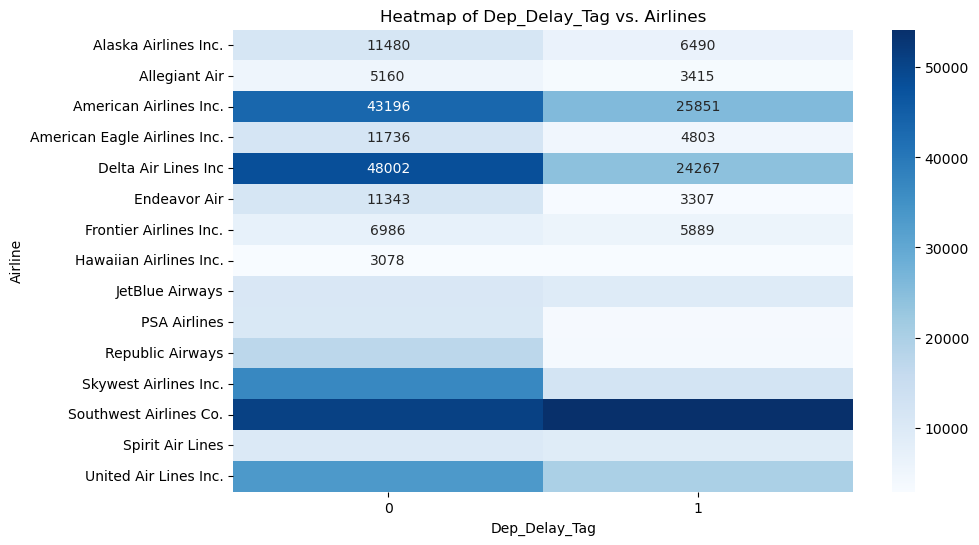

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Contingency table
contingency_table = pd.crosstab(df_sampled_3['Airline'], df_sampled_3['Dep_Delay_Tag'])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Dep_Delay_Tag vs. Airlines')
plt.xlabel('Dep_Delay_Tag')
plt.ylabel('Airline')
plt.show()

## 4. DepTime_label: 'Morning', 'Afternoon', 'Evening' and 'Night'  

### ANOVA

In [15]:

df_sampled_4 = df_merged.sample(n=500000, random_state=1)

print(df_sampled_4['Dep_Delay_Tag'].unique())

df_sampled_4['DepTime_label'] = df_sampled_4['DepTime_label'].astype('category')

model = ols('Dep_Delay_Tag ~ C(DepTime_label)', data=df_sampled_4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

[0 1]
                         sum_sq        df            F  PR(>F)
C(DepTime_label)    4143.704586       3.0  6088.577423     0.0
Residual          113427.465582  499996.0          NaN     NaN


### Chi-Square 

In [16]:
contingency_table = pd.crosstab(df_sampled_4['DepTime_label'], df_sampled_4['Dep_Delay_Tag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 17622.11169698438
p-value: 0.0
Degrees of Freedom: 3
Expected Frequencies Table:
[[108757.094852  66123.905148]
 [ 72033.75036   43796.24964 ]
 [120354.136868  73174.863132]
 [  9801.01792    5958.98208 ]]


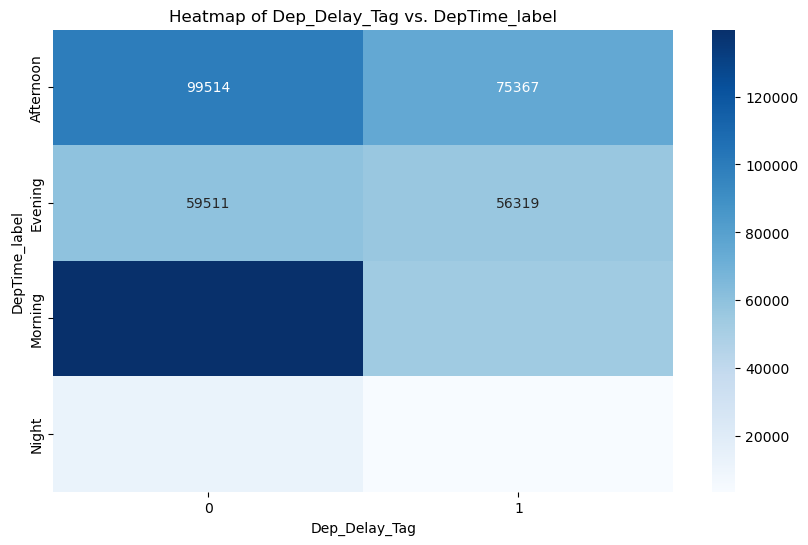

In [17]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Dep_Delay_Tag vs. DepTime_label')
plt.xlabel('Dep_Delay_Tag')
plt.ylabel('DepTime_label')
plt.show()

## 5. Feature: Month

### ANOVA 

In [20]:
df_sampled_5 = df_merged.sample(n=500000, random_state=1)

print(df_sampled_5['Dep_Delay_Tag'].unique())

df_sampled_5['Month'] = df_sampled_5['Month'].astype('category')

model = ols('Dep_Delay_Tag ~ C(Month)', data=df_sampled_5).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

[0 1]
                 sum_sq        df           F  PR(>F)
C(Month)    1170.730417      11.0  457.161003     0.0
Residual  116400.439751  499988.0         NaN     NaN


### Chi-Square

In [21]:
contingency_table = pd.crosstab(df_sampled_5['Month'], df_sampled_5['Dep_Delay_Tag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 4978.815875525641
p-value: 0.0
Degrees of Freedom: 11
Expected Frequencies Table:
[[24373.813156 14819.186844]
 [22897.441548 13921.558452]
 [26448.444868 16080.555132]
 [25356.402516 15416.597484]
 [26328.419712 16007.580288]
 [25978.916408 15795.083592]
 [27059.142812 16451.857188]
 [27285.5115   16589.4885  ]
 [25828.418544 15703.581456]
 [27444.09396  16685.90604 ]
 [25794.836376 15683.163624]
 [26150.5586   15899.4414  ]]


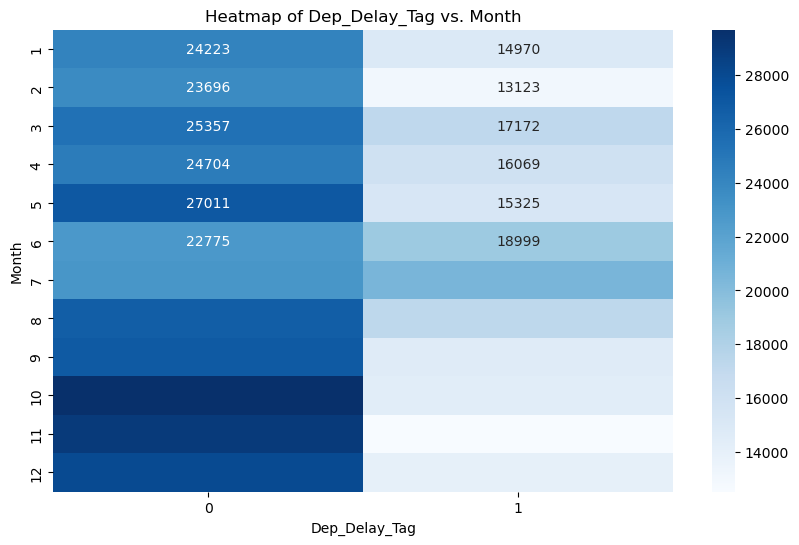

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Dep_Delay_Tag vs. Month')
plt.xlabel('Dep_Delay_Tag')
plt.ylabel('Month')
plt.show()

## 6. Feature: Day Of Week

### ANOVA

In [23]:

df_sampled_5 = df_merged.sample(n=500000, random_state=1)

print(df_sampled_5['Dep_Delay_Tag'].unique())

model = ols('Dep_Delay_Tag ~ C(Day_Of_Week)', data=df_sampled_5).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

[0 1]
                       sum_sq        df           F         PR(>F)
C(Day_Of_Week)     302.350063       6.0  214.852386  5.613535e-275
Residual        117268.820105  499993.0         NaN            NaN


### Chi-Square 

In [26]:
contingency_table = pd.crosstab(df_sampled_5['Day_Of_Week'], df_sampled_5['Dep_Delay_Tag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 1285.8171882134716
p-value: 1.2733995914344982e-274
Degrees of Freedom: 6
Expected Frequencies Table:
[[45896.251492 27904.748508]
 [43186.046156 26256.953844]
 [43724.604628 26584.395372]
 [46243.267228 28115.732772]
 [46205.331816 28092.668184]
 [40160.541576 24417.458424]
 [45529.957104 27682.042896]]


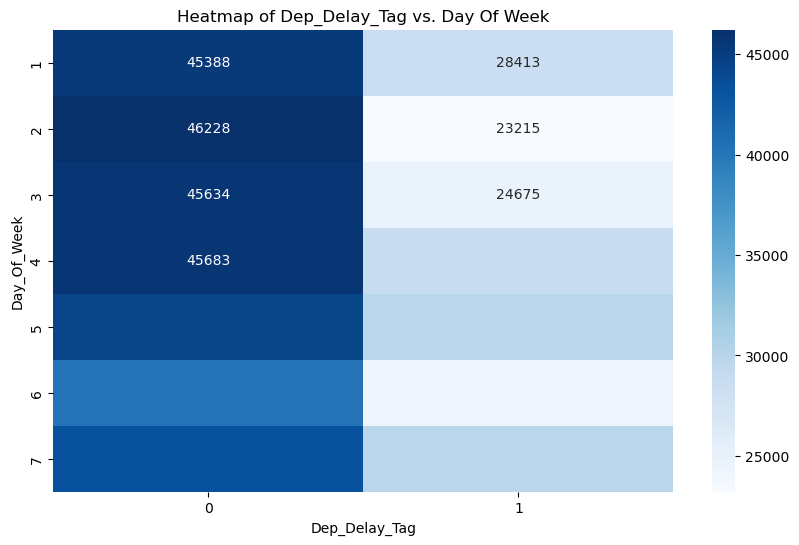

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Dep_Delay_Tag vs. Day Of Week')
plt.xlabel('Dep_Delay_Tag')
plt.ylabel('Day_Of_Week')
plt.show()

## 7. Feature: Distance_type

### ANOVA

In [27]:
df_sampled_6= df_merged.sample(n=500000, random_state=1)

print(df_sampled_6['Dep_Delay_Tag'].unique())

df_sampled_6['Distance_type'] = df_sampled_6['Distance_type'].astype('category')

model = ols('Dep_Delay_Tag ~ C(Distance_type)', data=df_sampled_6).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

[0 1]
                         sum_sq        df           F         PR(>F)
C(Distance_type)     221.530746       2.0  471.943112  1.701883e-205
Residual          117349.639423  499997.0         NaN            NaN


### Chi-Square

In [28]:
contingency_table = pd.crosstab(df_sampled_3['Distance_type'], df_sampled_3['Dep_Delay_Tag'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 942.1133819832215
p-value: 2.6465398562002116e-205
Degrees of Freedom: 2
Expected Frequencies Table:
[[   631.22038     383.77962 ]
 [ 39545.490388  24043.509612]
 [270769.289232 164626.710768]]
